In [1]:
from river import (
    naive_bayes,
    datasets,
    tree
)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import (
    Experiment,
    ArtificialDataStream,
    LabelShiftDataStream,
    HyperPlaneStream,
)

import warnings
warnings.filterwarnings('ignore')

## TODO:
* Hyperparameter tuning
* Color plots
* Add drift variable to plots

## Experiments

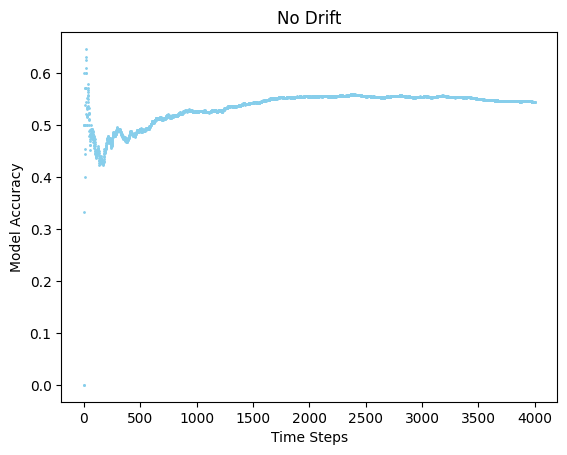

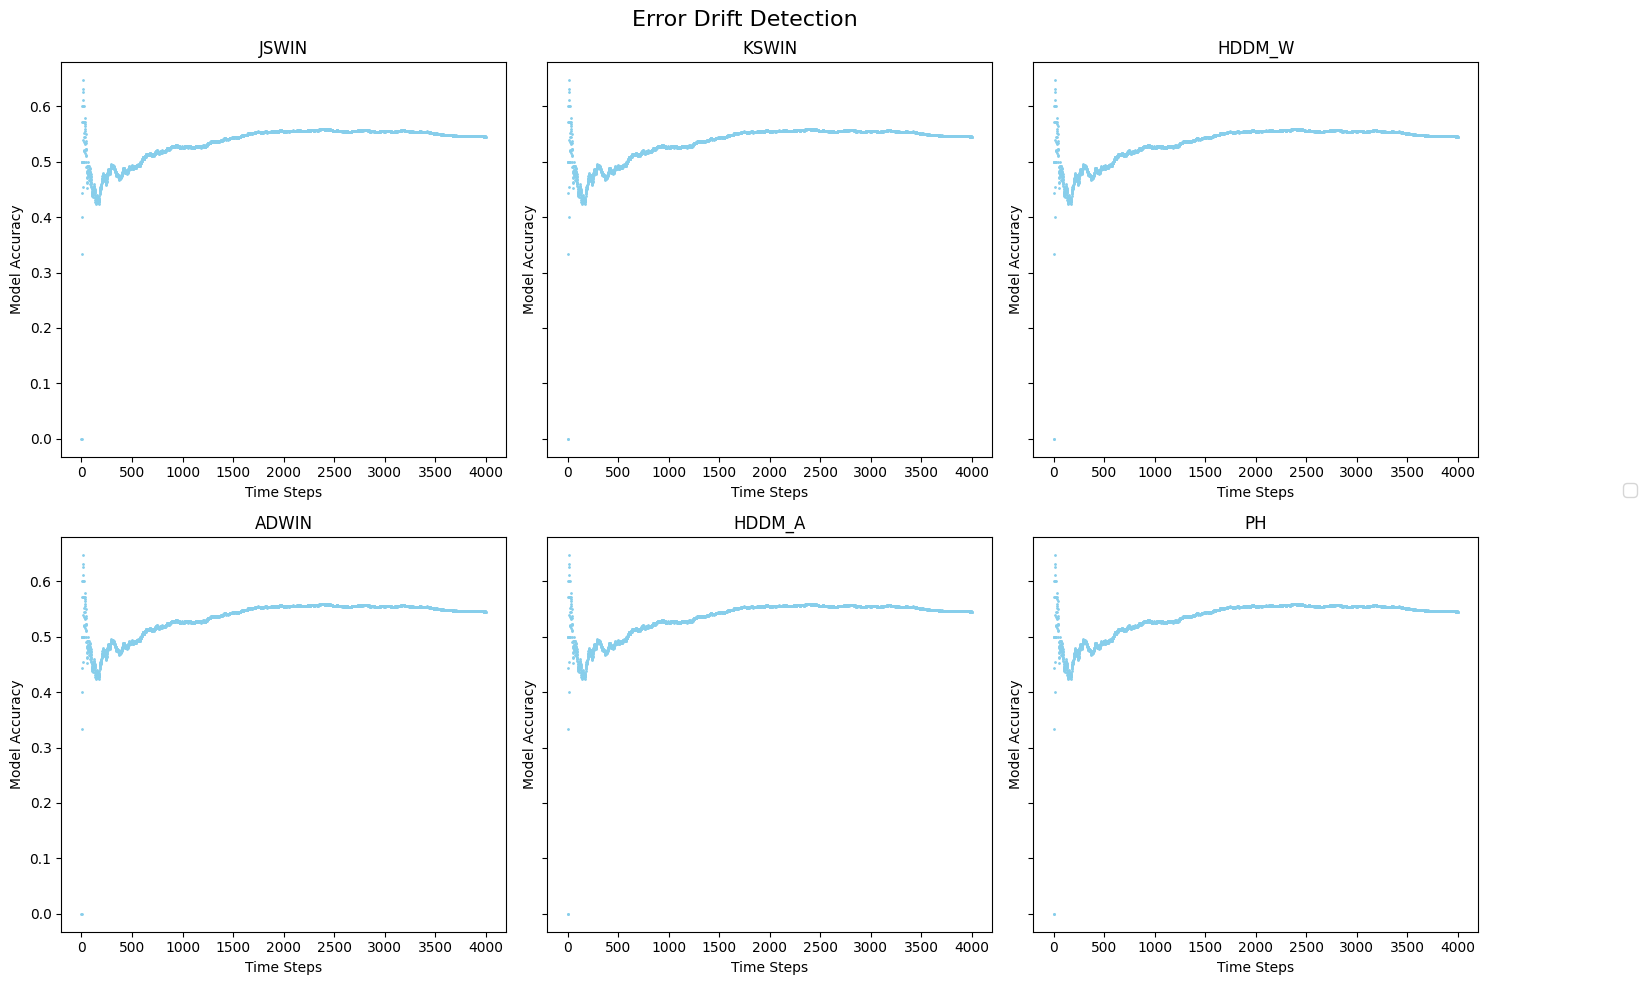

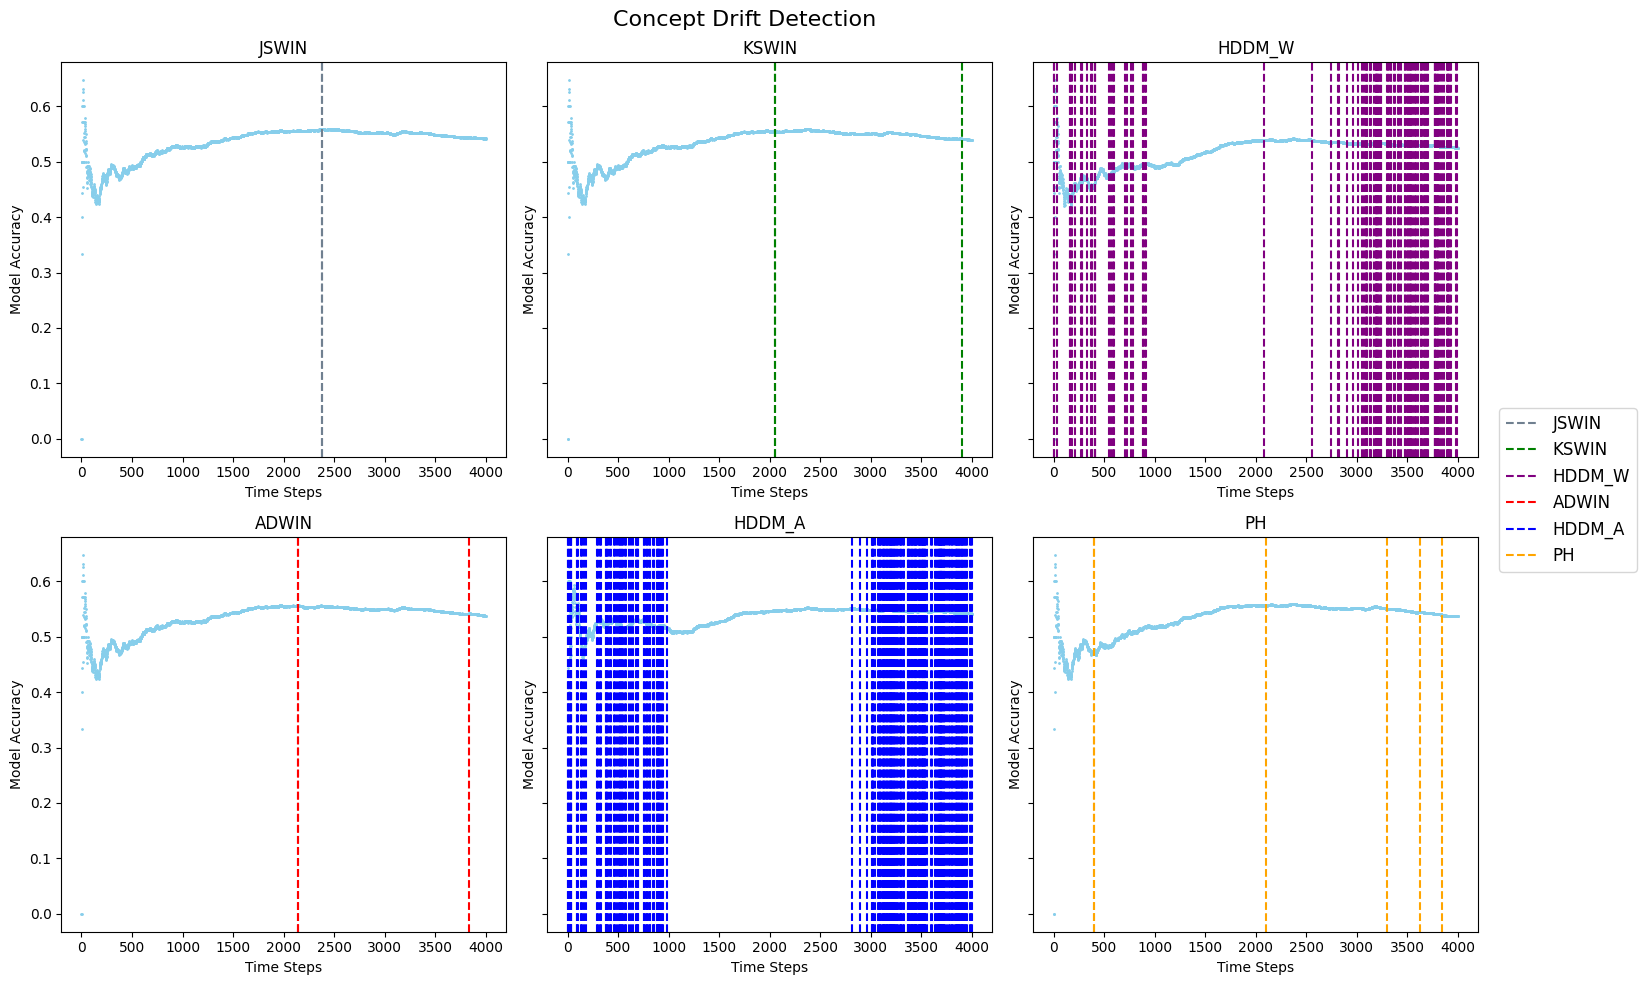

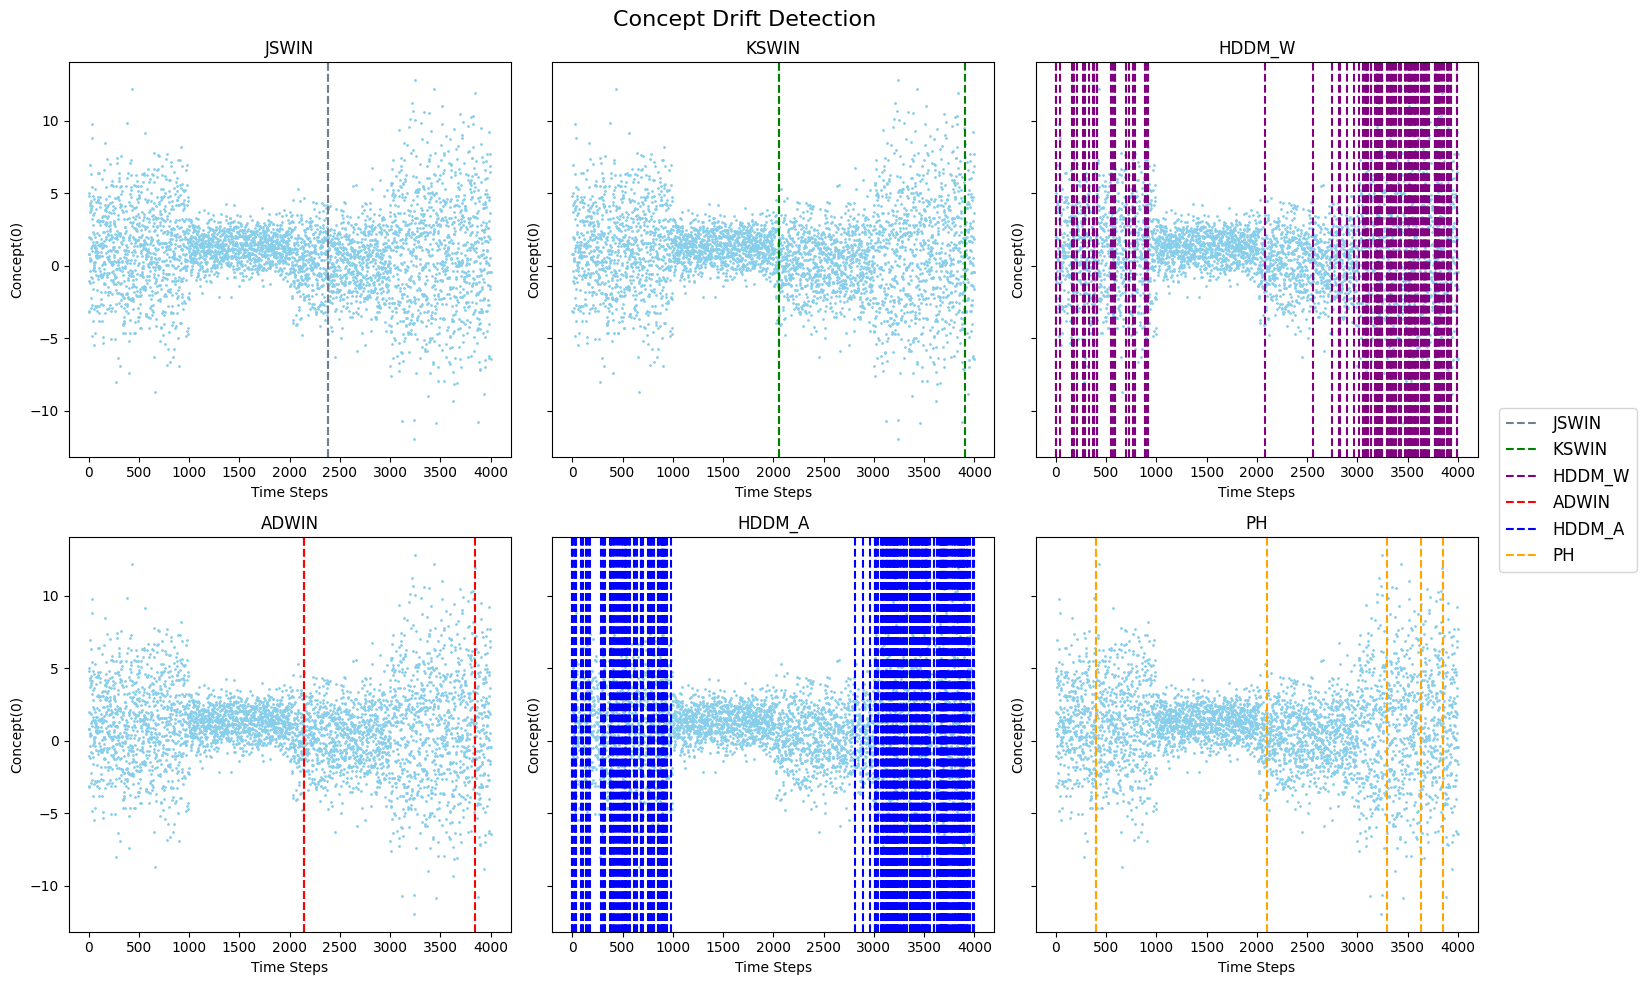

In [10]:
artifical_ds = ArtificialDataStream(
    distribution_types=[np.random.normal for i in range(5)],
    pos_distribution_params=[
        (0, 1),
        (1, 3),
        (1, 1),
        (0, 2),
        (0.5, 4)
    ],
    neg_distribution_params=[
        (0.5, 1),
        (1.5, 3),
        (1.5, 1),
        (0.5, 2),
        (1, 4)
    ],
    samples_lens=[1000 for _ in range(5)]
)


window_size = 100
model_instance = naive_bayes.GaussianNB

exp = Experiment(
    model_instance=model_instance,
    data_stream=artifical_ds.data_stream(),
    window_size=window_size,
    drift_col_id=0
)
exp.run()

exp.plot(artifical_ds.X)

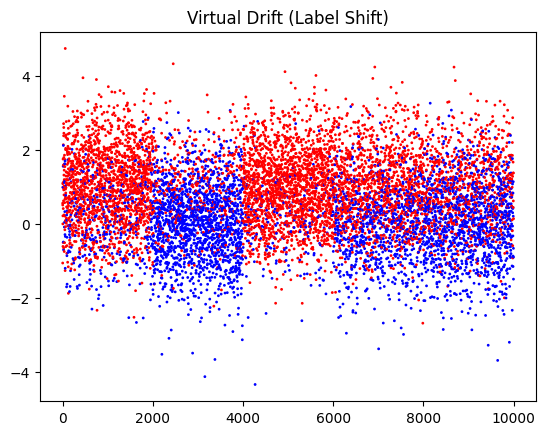

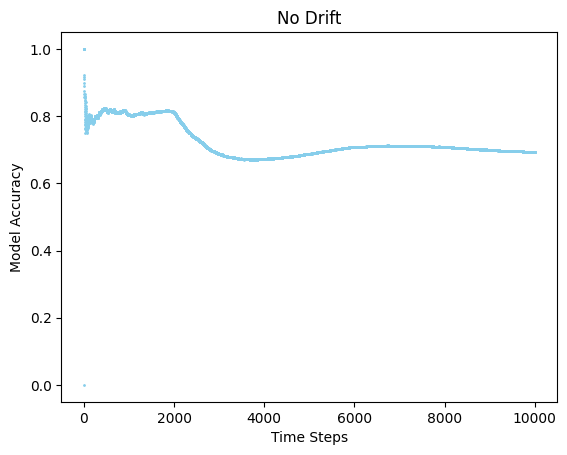

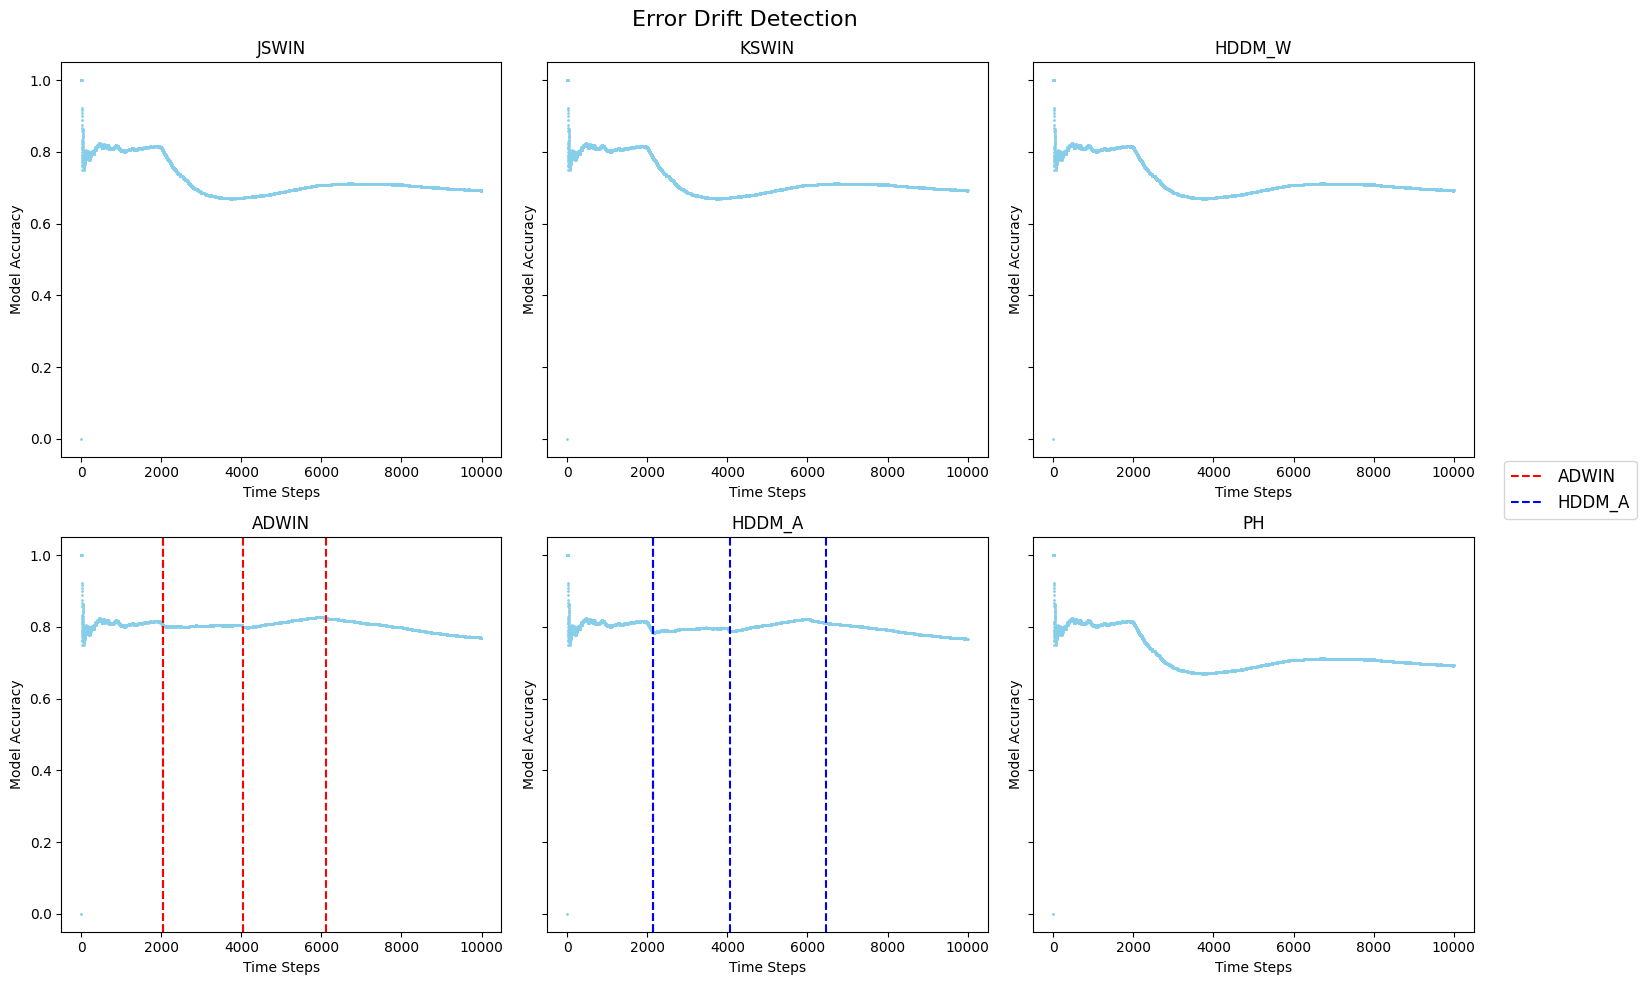

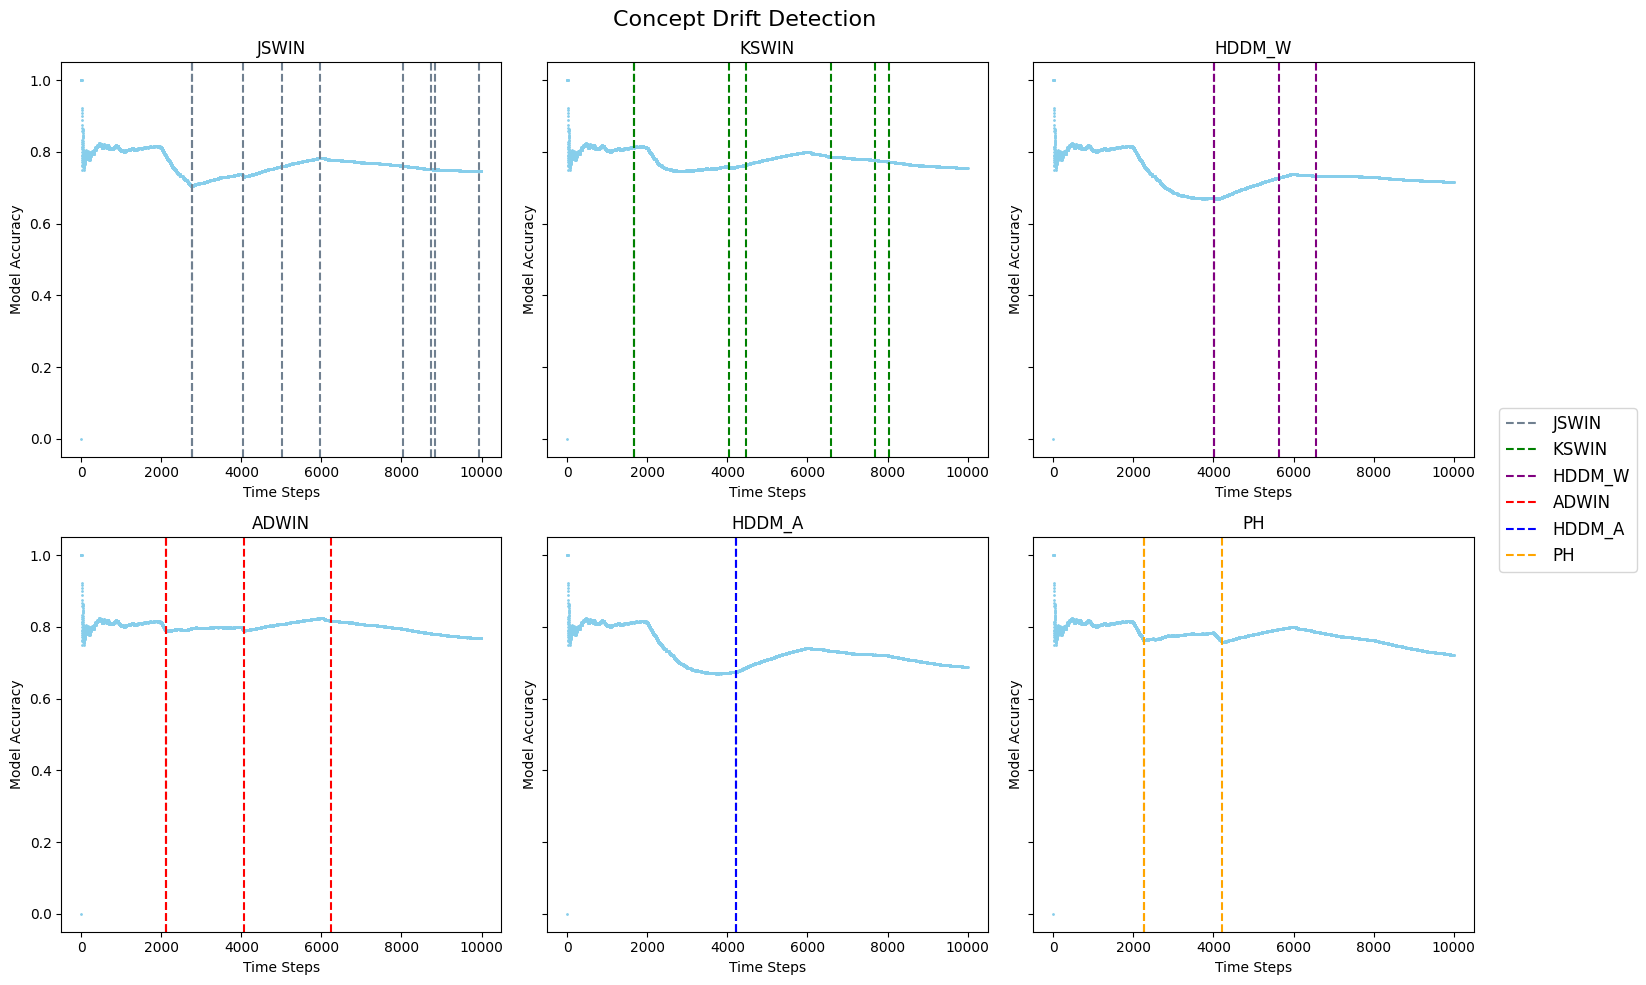

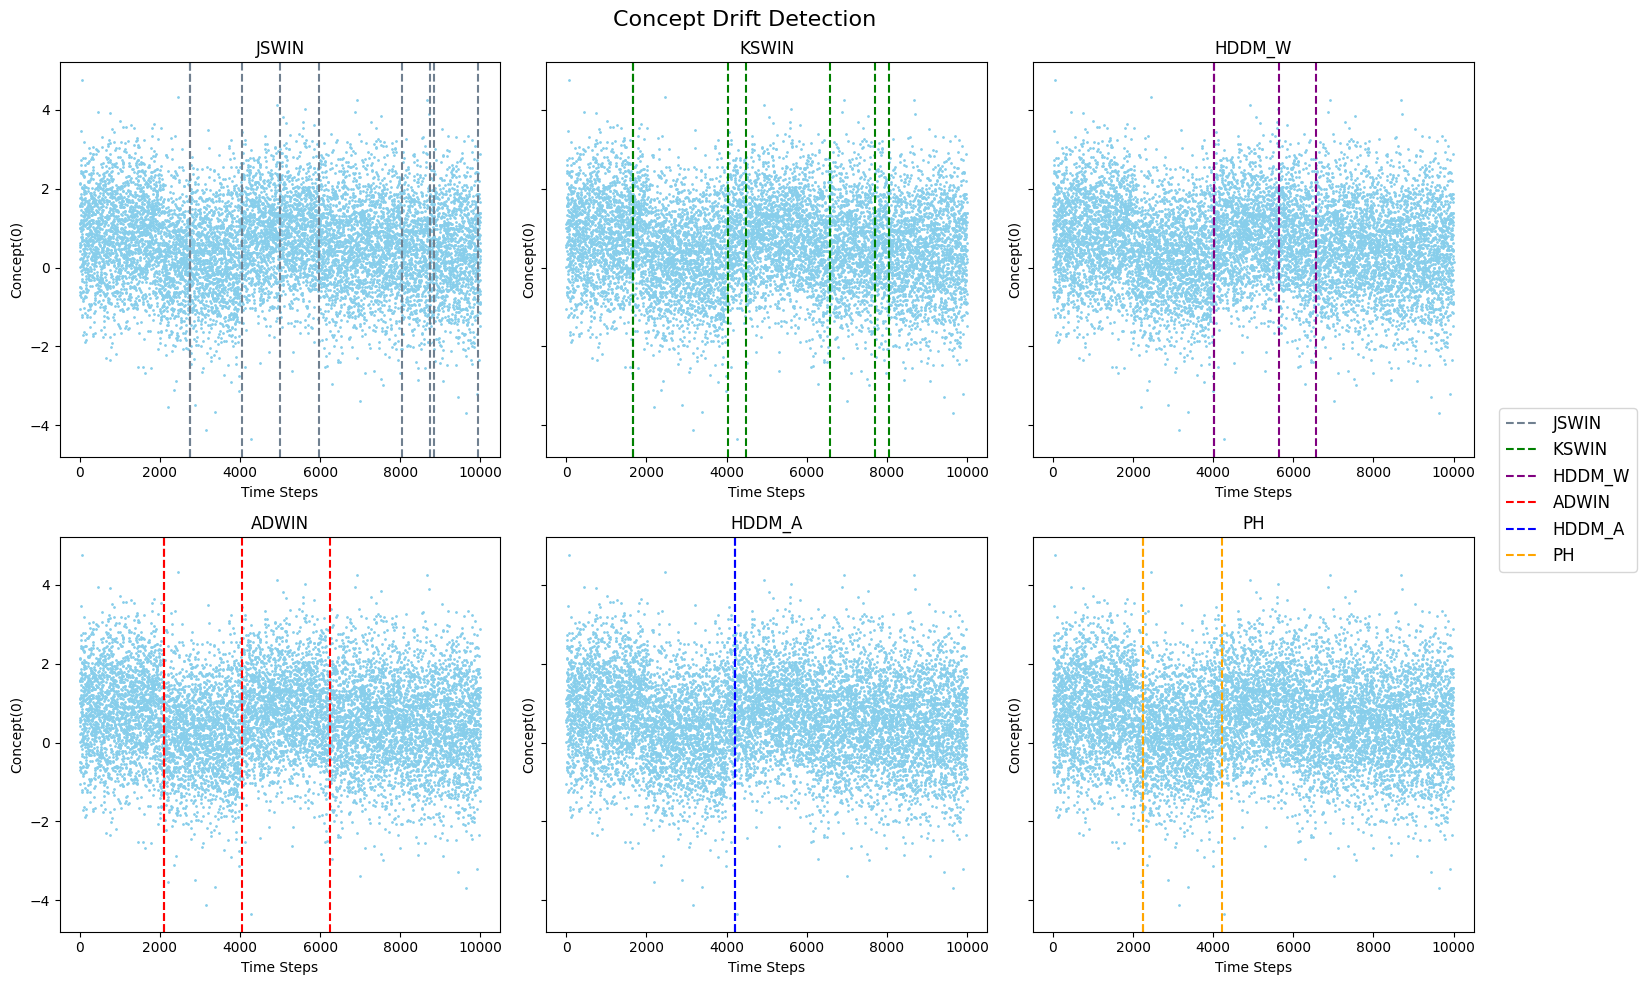

In [4]:
label_shift_ds = LabelShiftDataStream(n=10000, ratios=[0.2, 0.8, 0.1, 0.4, 0.6])
label_shift_ds.plot_stream()

window_size = 100
model_instance = naive_bayes.GaussianNB

exp = Experiment(
    model_instance=model_instance,
    data_stream=label_shift_ds.data_stream(),
    window_size=window_size,
    drift_col_id=0
)
exp.run()

exp.plot(label_shift_ds.X)

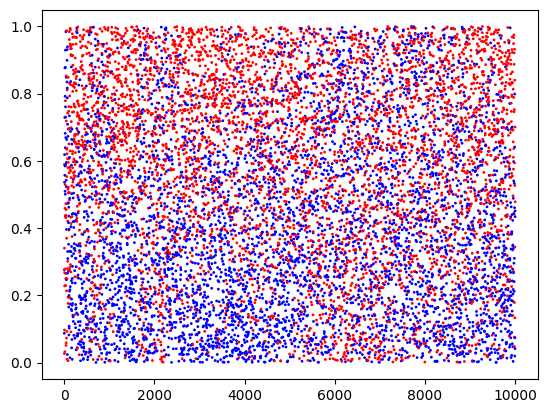

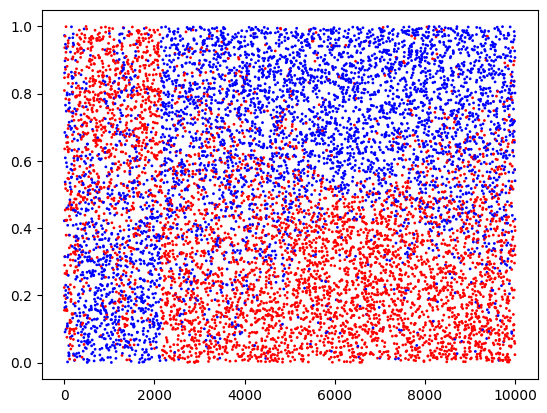

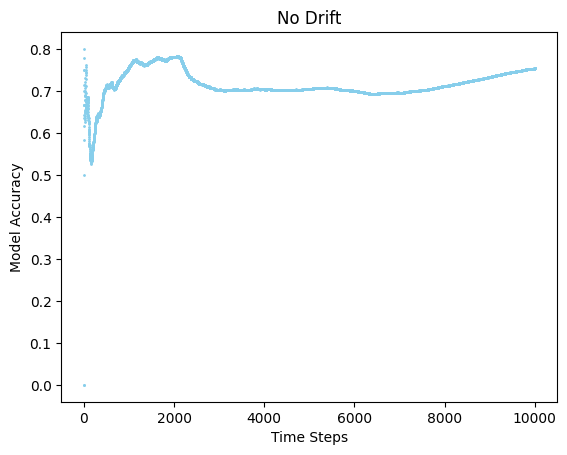

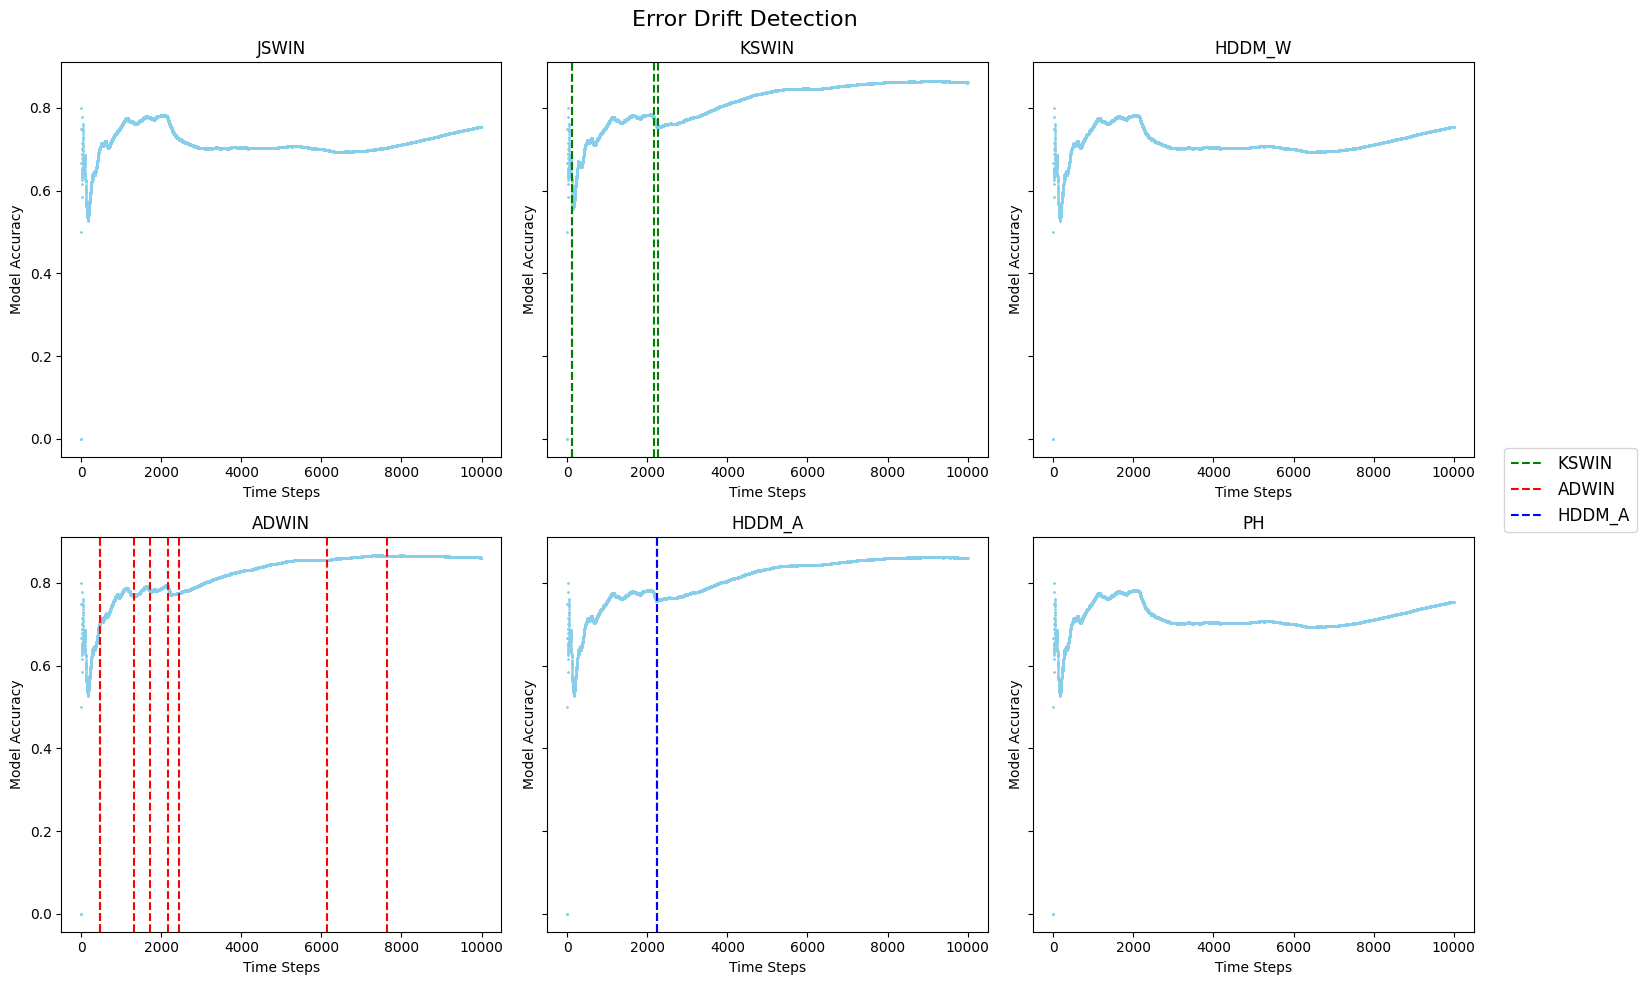

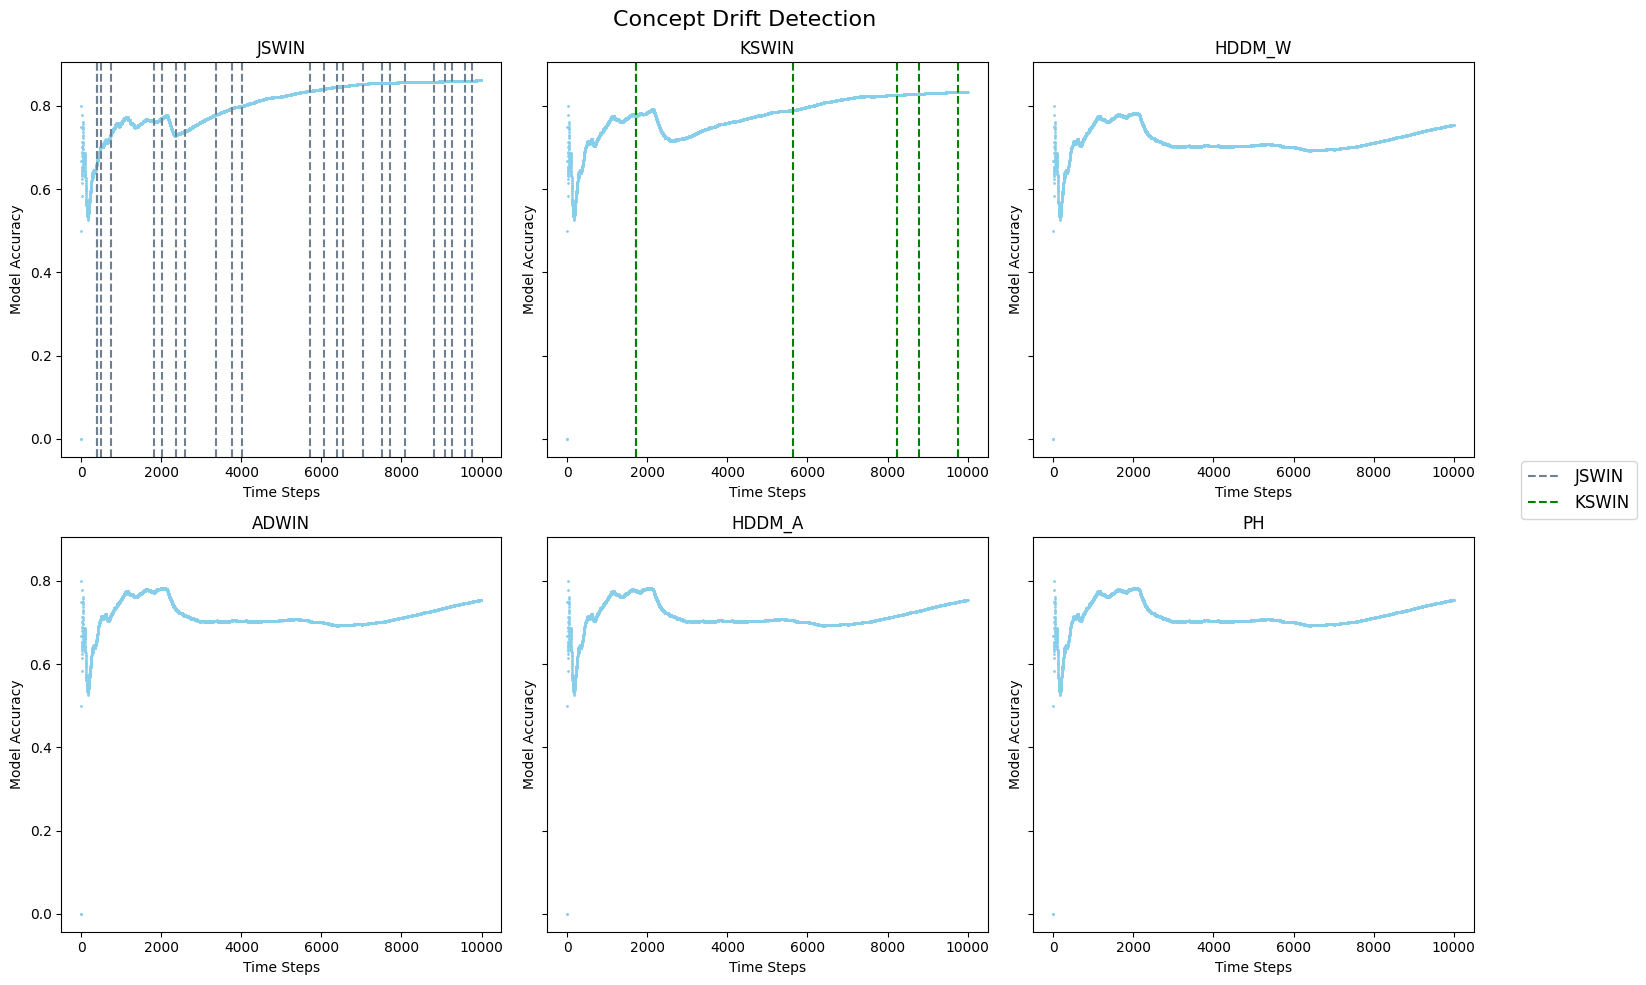

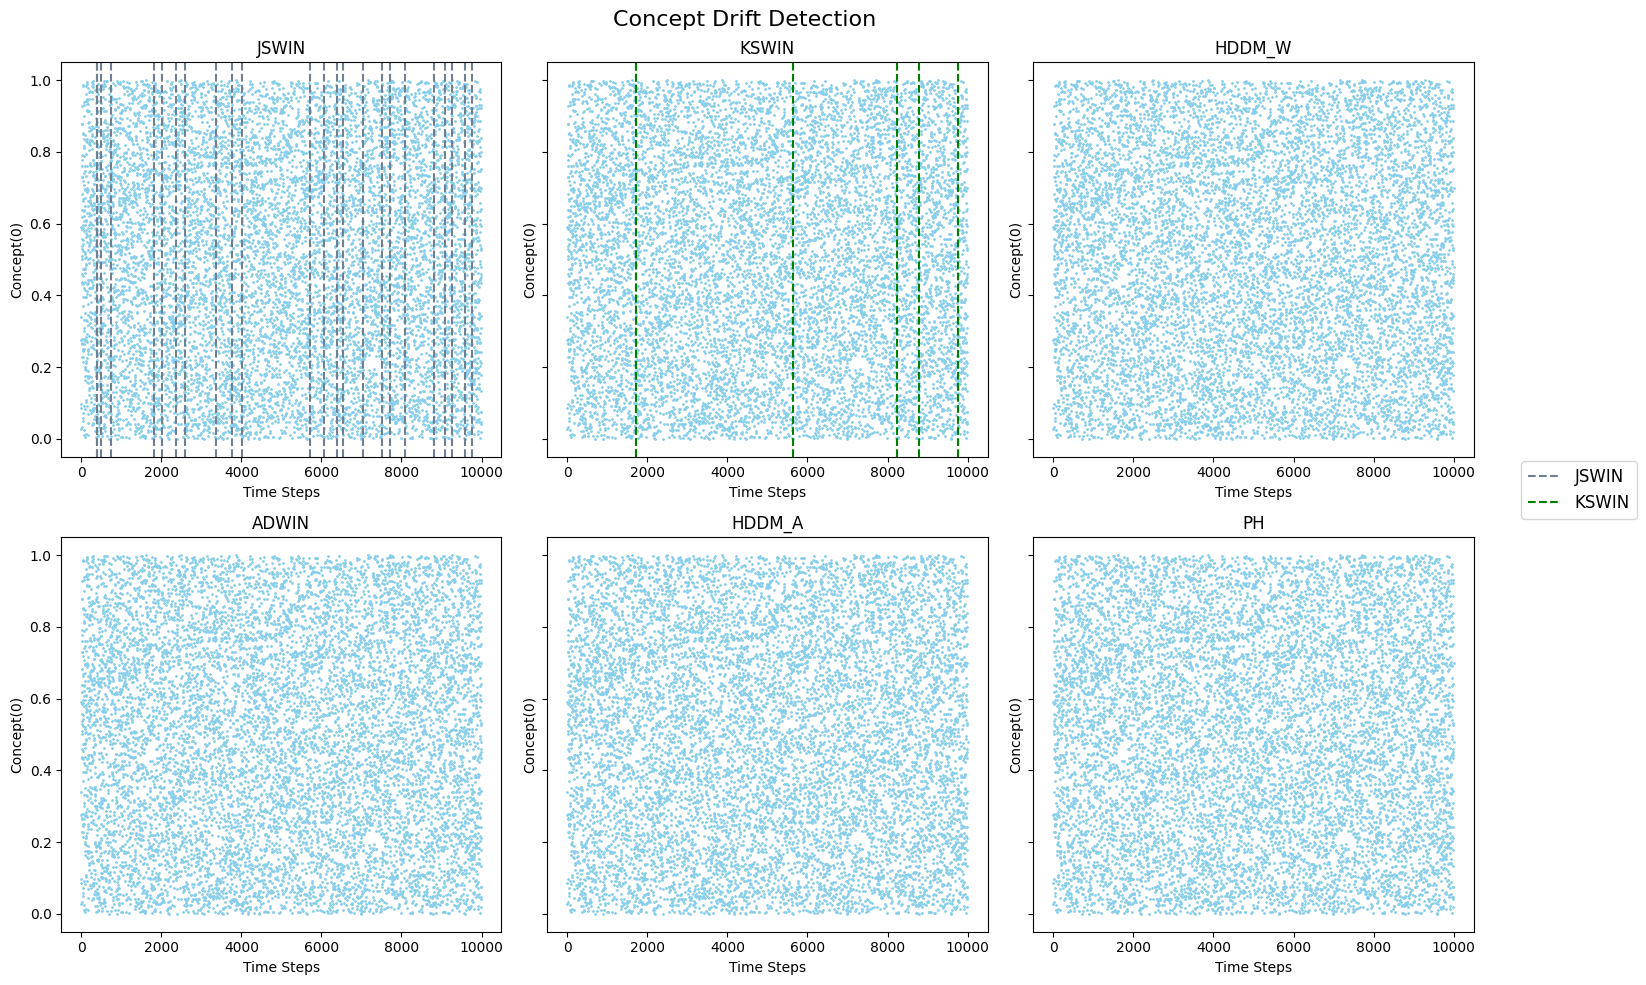

In [2]:
hyperplane_ds = HyperPlaneStream(
    seed=42,
    n_drift_features=2,
    n_features=2,
    mag_change=0.3
)
hyperplane_ds.plot_stream()

window_size = 100
model_instance = naive_bayes.GaussianNB

exp = Experiment(
    model_instance=model_instance,
    data_stream=hyperplane_ds.data_stream(),
    window_size=window_size,
    drift_col_id=0
)
exp.run()

exp.plot(hyperplane_ds.X)